bio-grid-yeast

In [22]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from scipy import stats

In [14]:
bio_graph = nx.read_edgelist('C:\\Users\\ElifB\\Desktop\\bio-yeast.txt', comments='#', nodetype = int)
num_nodes = len(nx.nodes(bio_graph))
num_edges = len(nx.edges(bio_graph))
print("Number of nodes: ", num_nodes, "\nNumber of edges: ", num_edges)

Number of nodes:  1458 
Number of edges:  1948


In [15]:
# Calculate the average degree of the graph
avg_degree = sum(dict(bio_graph.degree()).values()) / num_nodes

print("Average degree:", avg_degree)

Average degree: 2.672153635116598


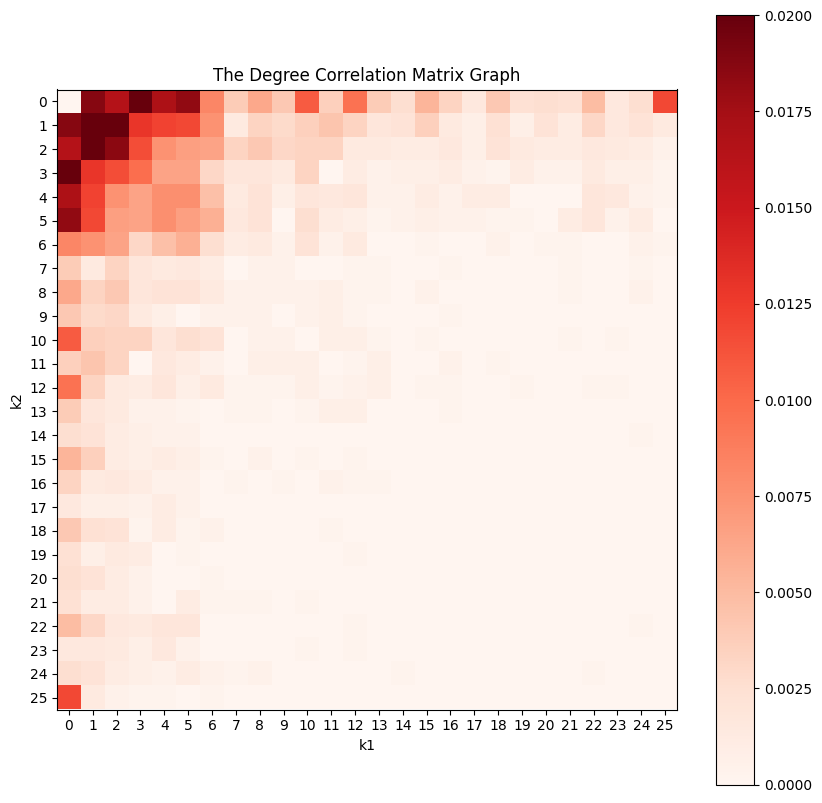

In [27]:
# Compute the degree correlation matrix
D = nx.degree_mixing_matrix(bio_graph)
# Plot the degree correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(D, cmap='Reds')
ax.set_xticks(range(len(D)))
ax.set_yticks(range(len(D)))
ax.set_xticklabels(range(len(D)))
ax.set_yticklabels(range(len(D)))
plt.xlabel('k1')
plt.ylabel('k2')
plt.title('The Degree Correlation Matrix Graph')
plt.colorbar(im)
plt.show()

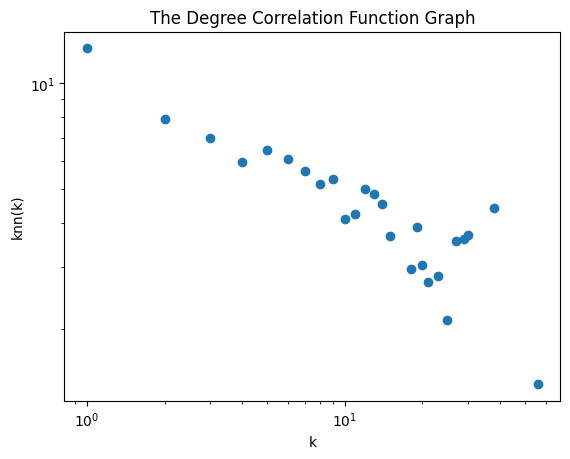

In [28]:
# calculate the average degree connectivity for the graph
knn = nx.average_degree_connectivity(bio_graph)

# extract the values of k and knn(k) for each degree k
k_values = list(knn.keys())
knn_values = list(knn.values())

# create a scatter plot of knn(k) versus k
plt.scatter(k_values, knn_values)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.title('The Degree Correlation Function Graph')
plt.xscale('log')
plt.yscale('log')
plt.show()

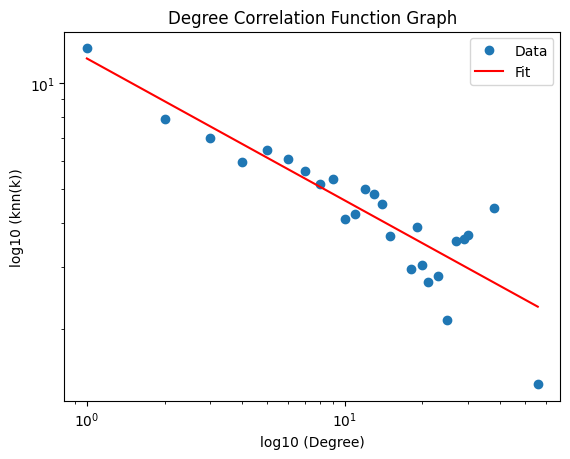

The correlation exponent is:  -0.4035425567003353


In [33]:
from scipy.optimize import curve_fit
# define the power-law function to fit
def power_law(k, a, u):
    return a * np.power(k, u)

# fit the power-law function to the data
params, cov = curve_fit(power_law, k_values, knn_values)

# extract the fitted parameters
a_fit = params[0]
u_fit = params[1]

# create a log-log plot of knn(k) versus k
plt.loglog(k_values, knn_values, 'o', label='Data')
plt.xlabel('k')
plt.ylabel('knn(k)')

# plot the fitted power-law function
k_fit = np.logspace(np.log10(min(k_values)), np.log10(max(k_values)), 100)
knn_fit = power_law(k_fit, a_fit, u_fit)
plt.loglog(k_fit, knn_fit, 'r-', label='Fit')

# add a legend to the plot
plt.legend()

plt.xlabel('log10 (Degree)')
plt.ylabel('log10 (knn(k))')
plt.title('Degree Correlation Function Graph')
plt.show()

print("The correlation exponent is: ", u_fit)

In [34]:
# calculate the degree correlation coefficient for the graph
degree_corr_coeff = nx.degree_pearson_correlation_coefficient(bio_graph)

# print the degree correlation coefficient
print("Degree correlation coefficient (r) is :", degree_corr_coeff)

Degree correlation coefficient (r) is : -0.20954054116464665
